##### Dataset Source : https://www.kaggle.com/hemanthhari/symptoms-and-covid-presence

Some of another list dataset:
1. Symptoms Disease (https://www.kaggle.com/usamag123/disease-prediction-through-symptoms)
2. Hepatitis Data (https://www.kaggle.com/codebreaker619/hepatitis-data)
3. Mental Disorder symptoms datasets (https://www.kaggle.com/rohitzaman/mental-health-symptoms-datasets)

In [1]:
# Manipulation Data
import pandas as pd
import matplotlib.pyplot as plt

# Splitting Data
from sklearn.model_selection import train_test_split

# Modeling Data
import tensorflow as tf
import numpy as np
from tensorflow import keras
from numpy import argmax
from keras.utils import to_categorical

In [2]:
# Read dataset has been found
dataset_symptoms = pd.read_csv("other_symptoms_dataset/Covid Dataset.csv")
dataset_symptoms.head(5)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [3]:
dataset_symptoms.drop(['Abroad travel','Contact with COVID Patient','Attended Large Gathering','Visited Public Exposed Places',
                       'Family working in Public Exposed Places', 'Wearing Masks', 'Sanitization from Market'],
                     axis=1,
                     inplace=True)

In [4]:
dataset_symptoms.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes


In [5]:
# Result : Terdapat 21 Kolom dengan 20 Independent variables dan 1 Dependent variables
# Serta memiliki 5434 data dan seluruh data bertipe object (teridentifikasi String)
dataset_symptoms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Breathing Problem     5434 non-null   object
 1   Fever                 5434 non-null   object
 2   Dry Cough             5434 non-null   object
 3   Sore throat           5434 non-null   object
 4   Running Nose          5434 non-null   object
 5   Asthma                5434 non-null   object
 6   Chronic Lung Disease  5434 non-null   object
 7   Headache              5434 non-null   object
 8   Heart Disease         5434 non-null   object
 9   Diabetes              5434 non-null   object
 10  Hyper Tension         5434 non-null   object
 11  Fatigue               5434 non-null   object
 12  Gastrointestinal      5434 non-null   object
 13  COVID-19              5434 non-null   object
dtypes: object(14)
memory usage: 594.5+ KB


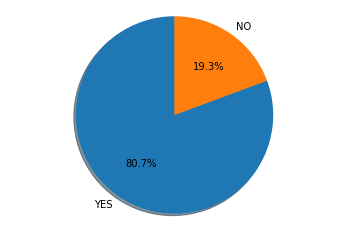

In [6]:
# Result : Jika dilihat data ini masih imbalance, lebih kebanyakan data condong ke arah YES untuk covid
# Ini akan berakibat model yang hanya mengetahui lebih jauh hanya orang yang terkena Covid
# Perbandingan yang disarankan kisaran 40/60 atau 50/50. Perlu dilakukan proses lanjutan mengenai hal ini
disease = dataset_symptoms["COVID-19"].value_counts().reset_index() 

# Visualize
labels = 'YES', 'NO'
sizes = list(disease["COVID-19"])

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [7]:
# Result : Disini dataset perlu dicheck terlebih dahulu jumlah data yang kosong atau kemungkinan null atau nilai
# Namun dataset ini bersih dan tidak memiliki data yang NaN atau kosong
dataset_symptoms.isnull().sum()

Breathing Problem       0
Fever                   0
Dry Cough               0
Sore throat             0
Running Nose            0
Asthma                  0
Chronic Lung Disease    0
Headache                0
Heart Disease           0
Diabetes                0
Hyper Tension           0
Fatigue                 0
Gastrointestinal        0
COVID-19                0
dtype: int64

In [8]:
# Result : Cek apakah dataset ini memiliki duplikasi atau tidak
# Dataset ini memiliki banyak dataset dari 5434 terdapat hanya 466 data yang valid untuk dikerjakan
# Maka perlu dihilangkan dataset yang duplikasi ini sebelum data di encoding
print(len(dataset_symptoms) - len(dataset_symptoms[dataset_symptoms.duplicated() == True]))
dataset_symptoms.drop_duplicates(inplace = True) # Sudah bersih

451


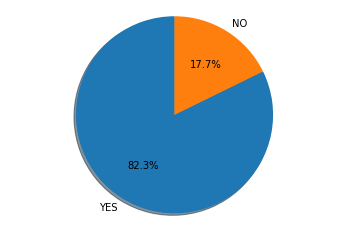

In [9]:
# Result : Walaupun dataset ini sudah dihilangkan duplikasinya, namun dataset ini tetap imbalance
disease = dataset_symptoms["COVID-19"].value_counts().reset_index()

# Visualize
labels = 'YES', 'NO'
sizes = list(disease["COVID-19"])

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [10]:
# Result : dataset sebelum di perform ke hal yang lebih luas untuk mengetahui hal lain, perlu dilakukan encoding terlebih dahulu
# Karena akan mempermudah dalam penglihatan dan hal lain
# Encoding akan menghasilkan : 0 untuk YES/TRUE dan 1 untuk NO/FALSE
dataset_symptoms.replace({"Yes": 0, "No": 1}, inplace = True)

In [11]:
dataset_symptoms.head(5)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,COVID-19
0,0,0,0,0,0,1,1,1,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,1,1,0,1,0
2,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,0,0,0,1,1,0,1,1,0,0,1,1,1,0
4,0,0,0,0,0,1,0,0,0,0,0,1,0,0


### Tahapan Lanjutan

In [12]:
# Disini proses yang akan dilakukan adalah features selection, karena untuk mengetahui seberapa baik features kedepan untuk 
# digunakan atau terdapat korelasi setiap variable yang kurang berpengaruh terhadap identifikasi COVID 19
correlation_dataset_symptoms = dataset_symptoms.corr()
correlation_target_with_pearson = abs(correlation_dataset_symptoms["COVID-19"])
correlation_target_with_pearson
# Seperti yang dilihat korelasi ini hanya sebesar 10 - 40% (0.8% - 40.3%)
# Lalu untuk nilai NaN sepertinya data pada column ini angkanya tunggal yaitu mungkin hanya ada 1 atau 0 saja

Breathing Problem       0.407867
Fever                   0.279516
Dry Cough               0.374004
Sore throat             0.349908
Running Nose            0.107573
Asthma                  0.047413
Chronic Lung Disease    0.045407
Headache                0.005899
Heart Disease           0.033798
Diabetes                0.021451
Hyper Tension           0.075423
Fatigue                 0.044679
Gastrointestinal        0.014552
COVID-19                1.000000
Name: COVID-19, dtype: float64

In [13]:
# Setelah dataset diseleksi berdasarkan hal yang diperlukan dilakukan proses modeling
x = dataset_symptoms.iloc[: , :-1].astype('float32')
Y = dataset_symptoms.iloc[: , -1]
Y = to_categorical(Y)
x_train, x_test, y_train, y_test=train_test_split(x, Y, test_size=0.2)

In [14]:
# Percobaan untuk training dan validasi menggunakan Tensorflow Dense
# model = tf.keras.Sequential([keras.layers.Dense(units=512, input_shape=[x.shape[1]])]) # Sample

model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=[x_train.shape[1]]),
        tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(# YOUR CODE SHOULD START HERE
              # YOUR CODE SHOULD END HERE
              x_train, y_train, epochs=10, validation_data=(x_test, y_test)
)

Epoch 1/10
12/12 [==============================] - 4s 116ms/step - loss: 0.6235 - accuracy: 0.6116 - val_loss: 0.6023 - val_accuracy: 0.7582
Epoch 2/10
12/12 [==============================] - 0s 11ms/step - loss: 0.4440 - accuracy: 0.8406 - val_loss: 0.5832 - val_accuracy: 0.7582
Epoch 3/10
12/12 [==============================] - 0s 11ms/step - loss: 0.3702 - accuracy: 0.8533 - val_loss: 0.4817 - val_accuracy: 0.7802
Epoch 4/10
12/12 [==============================] - 0s 11ms/step - loss: 0.3086 - accuracy: 0.9026 - val_loss: 0.4476 - val_accuracy: 0.8352
Epoch 5/10
12/12 [==============================] - 0s 11ms/step - loss: 0.3105 - accuracy: 0.8937 - val_loss: 0.4388 - val_accuracy: 0.8352
Epoch 6/10
12/12 [==============================] - 0s 11ms/step - loss: 0.2947 - accuracy: 0.8962 - val_loss: 0.4214 - val_accuracy: 0.8462
Epoch 7/10
12/12 [==============================] - 0s 11ms/step - loss: 0.2732 - accuracy: 0.9096 - val_loss: 0.4546 - val_accuracy: 0.8462
Epoch 8/10
1

Text(0.5, 1.0, 'Training and validation loss')

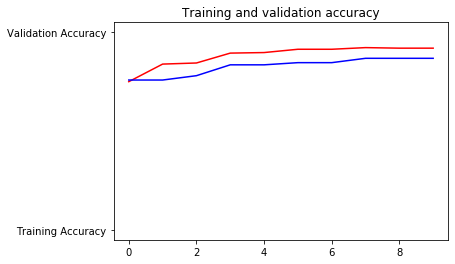

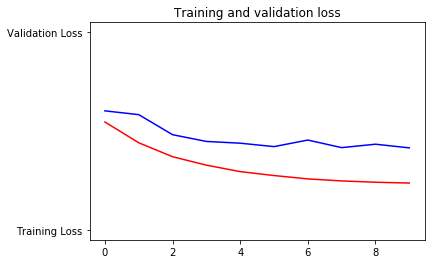

In [15]:
# Tahap representasi dataset divisualisasi
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 13)                0         
_________________________________________________________________
dense (Dense)                (None, 512)               7168      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 8,194
Trainable params: 8,194
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Sample Input to see the output
dict_prediction = {
    "Breathing Problem" : 0,
    "Fever" : 0,
    "Dry Cough" : 0,
    "Sore throat" : 0,
    "Running Nose" : 0,
    "Asthma" : 0,
    "Chronic Lung Disease" : 0,
    "Headache" : 0,
    "Heart Disease" : 0,
    "Diabetes" : 0,
    "Hyper Tension" : 0,
    "Fatigue" : 0,
    "Gastrointestinal" : 0
    
#     "Abroad travel" : 1,
#     "Contact with COVID Patient" : 0,
#     "Attended Large Gathering" : 0,
#     "Visited Public Exposed Places" : 0,
#     "Family working in Public Exposed Places" : 0,
#     "Wearing Masks" : 0,
#     "Sanitization from Market" : 0,
}

predicted_class = model.predict([list(dict_prediction.values())])
print(f'Predicted: {predicted_class} (class={argmax(predicted_class)})')

Predicted: [[0.8497108  0.15028912]] (class=0)


In [18]:
# Perubahan Model menjadi TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\NAZIMF~1\AppData\Local\Temp\tmpondjhrhp\assets


In [19]:
# Simpan model
with open('covid_prediction.tflite', 'wb') as f:
    f.write(tflite_model)